# Keras World

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os #shutil
import os.path
import pathlib
from pathlib import Path
from glob import glob


import PIL
import PIL.Image
#import tensorflow as tf


import cv2
from keras.preprocessing.image import ImageDataGenerator

# 1. setup & EDA
- get dat from path folder

In [2]:
import pathlib
train_dir = pathlib.Path('../dataset/afhq/train')
val_dir = pathlib.Path('../dataset/afhq/val')

In [90]:
image_count = len(list(train_dir.glob('**/*.jpg')))
print(image_count)

14630


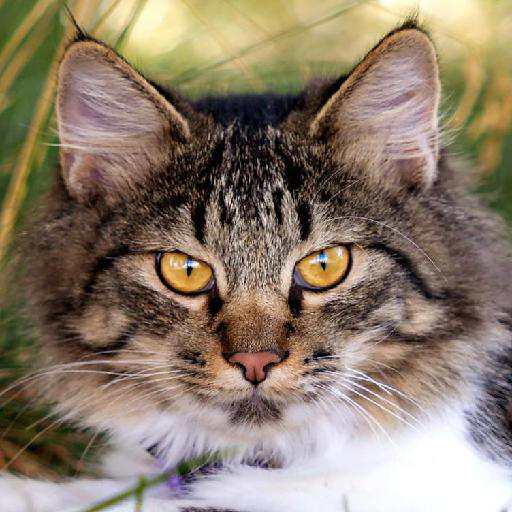

In [93]:
cats = list(train_dir.glob('cat/*'))
PIL.Image.open(str(cats[0]))

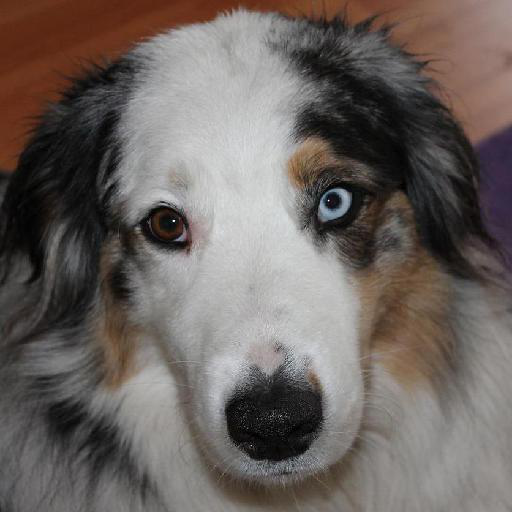

In [94]:
dogs = list(train_dir.glob('dog/*'))
PIL.Image.open(str(dogs[0]))

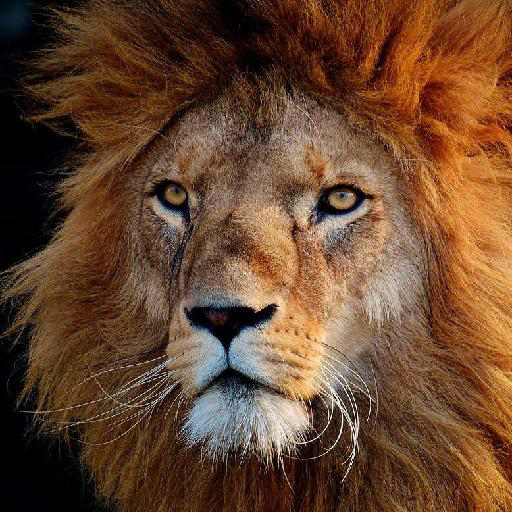

In [95]:
wilds = list(train_dir.glob('wild/*'))
PIL.Image.open(str(wilds[0]))

### distribution of the target variables

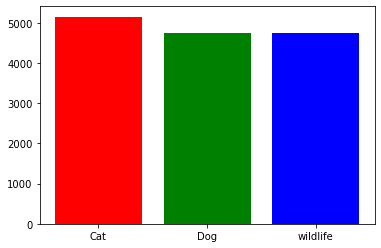

In [96]:
# create a dataset
height = [len(cats), len(dogs), len(wilds)]
bars = ('Cat', 'Dog', 'wildlife') 
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['red', 'green', 'blue'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [97]:
print(len(cats), len(dogs), len(wilds))

5153 4739 4738


# 2. Load images 
using keras.preprocessing & ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rescale=1./255)

In [29]:
batch_size = 32  
img_height = 150  # 180  
img_width = 150   # 180   (choose to use 150 instead of 180 bcuz future match shape for VGG use)

In [30]:
# train_ds
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(img_height, img_width),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')


Found 14630 images belonging to 3 classes.


In [31]:
# val_ds
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 1500 images belonging to 3 classes.


In [32]:
# #train_ds.class_names
train_generator.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [33]:
train_generator.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# 3. Build CNN Models
## baseline
32, 32, 32  with input_shape 180

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, Dropout 

In [86]:
num_classes = 3

model_0 = Sequential()

model_0.add(InputLayer(input_shape=(150,150,3)))

model_0.add(Conv2D(32, 3, activation='relu'))   # or put ,input_shape=(180,180,3) in the first layer is fine too
model_0.add(MaxPooling2D())

model_0.add(Conv2D(32, 3, activation='relu'))   # 64
model_0.add(MaxPooling2D())

model_0.add(Conv2D(32, 3, activation='relu'))   # 128
model_0.add(MaxPooling2D())

model_0.add(Flatten())
model_0.add(Dense(128, activation='relu'))
model_0.add(Dense(num_classes , activation = 'softmax'))  # 

model_0.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])  

In [87]:
model_0.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 9248)            

In [ ]:
# fit_generaotor created lables automatically, no need to create myself

In [88]:
epochs=10 

history_0 = model_0.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=epochs
)                                        

Epoch 1/10
458/458 [==============================] - 309s 670ms/step - loss: 1.2362 - accuracy: 0.3917 - val_loss: 1.2032 - val_accuracy: 0.5147
Epoch 2/10
458/458 [==============================] - 308s 669ms/step - loss: 0.7480 - accuracy: 0.6988 - val_loss: 0.4421 - val_accuracy: 0.8207
Epoch 3/10
458/458 [==============================] - 301s 657ms/step - loss: 0.3432 - accuracy: 0.8692 - val_loss: 0.2371 - val_accuracy: 0.9147
Epoch 4/10
458/458 [==============================] - 343s 748ms/step - loss: 0.2421 - accuracy: 0.9095 - val_loss: 0.3033 - val_accuracy: 0.8860
Epoch 5/10
458/458 [==============================] - 383s 835ms/step - loss: 0.1536 - accuracy: 0.9459 - val_loss: 0.2094 - val_accuracy: 0.9200
Epoch 6/10
458/458 [==============================] - 458s 999ms/step - loss: 0.0947 - accuracy: 0.9668 - val_loss: 0.1946 - val_accuracy: 0.9373
Epoch 7/10
458/458 [==============================] - 334s 729ms/step - loss: 0.0552 - accuracy: 0.9813 - val_loss: 0.2164 -

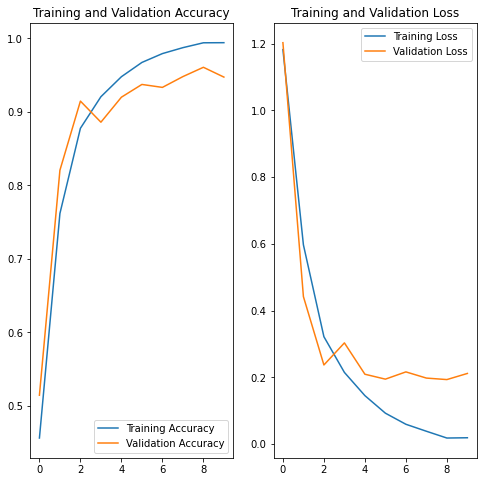

In [89]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##  baseline - upgrade 1 
32,64, 128 with **final** input_shape 150

In [40]:
num_classes = 3

model_1_ = Sequential()

model_1_.add(InputLayer(input_shape=(150, 150,3)))

model_1_.add(Conv2D(32, 3, activation='relu'))   # or put ,input_shape=(150,150,3) in the first layer is fine too
model_1_.add(MaxPooling2D())

model_1_.add(Conv2D(64, 3, activation='relu'))   
model_1_.add(MaxPooling2D())

model_1_.add(Conv2D(128, 3, activation='relu'))    
model_1_.add(MaxPooling2D())

model_1_.add(Flatten())
model_1_.add(Dense(128, activation='relu'))    #512
model_1_.add(Dense(num_classes , activation = 'softmax'))  # 

model_1_.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])

In [27]:
(len(train_generator.labels)/80)

182.875

In [41]:
result_1_ = model_1_.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=10) #,  # 30
                                
                                # this might help
                             #steps_per_epoch=(len(train_generator.labels)/80),
                             #validation_steps=(len(val_generator.labels)/80)
                             #)


Epoch 1/10
458/458 [==============================] - 357s 774ms/step - loss: 1.3885 - accuracy: 0.3750 - val_loss: 0.9949 - val_accuracy: 0.5540
Epoch 2/10
458/458 [==============================] - 340s 742ms/step - loss: 0.7676 - accuracy: 0.6881 - val_loss: 0.4620 - val_accuracy: 0.8287
Epoch 3/10
458/458 [==============================] - 348s 759ms/step - loss: 0.3646 - accuracy: 0.8624 - val_loss: 0.2864 - val_accuracy: 0.8933
Epoch 4/10
458/458 [==============================] - 349s 760ms/step - loss: 0.2125 - accuracy: 0.9248 - val_loss: 0.1684 - val_accuracy: 0.9360
Epoch 5/10
458/458 [==============================] - 370s 809ms/step - loss: 0.1359 - accuracy: 0.9492 - val_loss: 0.1568 - val_accuracy: 0.9480
Epoch 6/10
458/458 [==============================] - 323s 705ms/step - loss: 0.0884 - accuracy: 0.9657 - val_loss: 0.1452 - val_accuracy: 0.9480
Epoch 7/10
458/458 [==============================] - 353s 770ms/step - loss: 0.0610 - accuracy: 0.9793 - val_loss: 0.4488 -

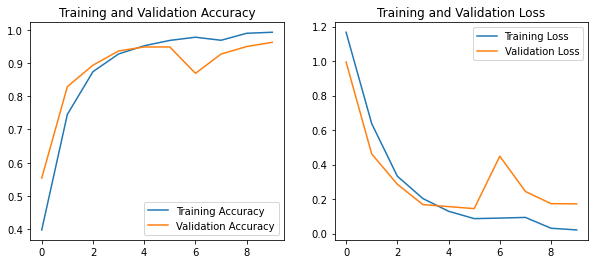

In [44]:
acc = result_1_.history['accuracy']
val_acc = result_1_.history['val_accuracy']

loss = result_1_.history['loss']
val_loss = result_1_.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

##  baseline - upgrade 2
32,64, 128 with **final** input_shape 150
- Dense try 256 or 512 :


turned off 512 got better scores bcuz more nodes is better

In [45]:
num_classes = 3

model_2 = Sequential()

model_2.add(InputLayer(input_shape=(150, 150,3)))

model_2.add(Conv2D(32, 3, activation='relu'))    
model_2.add(MaxPooling2D())

model_2.add(Conv2D(64, 3, activation='relu'))   
model_2.add(MaxPooling2D())

model_2.add(Conv2D(128, 3, activation='relu'))    
model_2.add(MaxPooling2D())

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))    # 256 
model_2.add(Dense(num_classes , activation = 'softmax'))  

model_2.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])

In [46]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)            

In [80]:
# best model candidate 

result_2 = model_2.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=10) #,  # 30
                             #steps_per_epoch=(len(train_generator.labels)/80),
                             #validation_steps=(len(val_generator.labels)/80)
                             #)

Epoch 1/10
458/458 [==============================] - 406s 878ms/step - loss: 2.6384e-04 - accuracy: 1.0000 - val_loss: 0.1742 - val_accuracy: 0.9673
Epoch 2/10
458/458 [==============================] - 493s 1s/step - loss: 9.6036e-05 - accuracy: 1.0000 - val_loss: 0.1809 - val_accuracy: 0.9687
Epoch 3/10
458/458 [==============================] - 479s 1s/step - loss: 5.5962e-05 - accuracy: 1.0000 - val_loss: 0.1895 - val_accuracy: 0.9693
Epoch 4/10
458/458 [==============================] - 560s 1s/step - loss: 3.7299e-05 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9693
Epoch 5/10
458/458 [==============================] - 648s 1s/step - loss: 2.6113e-05 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.9693
Epoch 6/10
458/458 [==============================] - 475s 1s/step - loss: 1.8680e-05 - accuracy: 1.0000 - val_loss: 0.2083 - val_accuracy: 0.9707
Epoch 7/10
458/458 [==============================] - 547s 1s/step - loss: 1.3604e-05 - accuracy: 1.0000 - val_loss

In [81]:
model_2.save('animal_face_m2.h5')   # 0.969 accuracy 

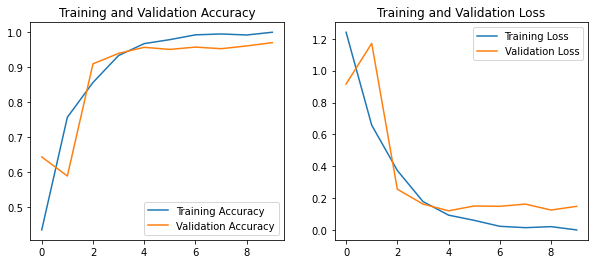

In [52]:
acc = result_2.history['accuracy']
val_acc = result_2.history['val_accuracy']

loss = result_2.history['loss']
val_loss = result_2.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Dropout
why? 

- Try to add dropout to all hidden layers of the model; this may promote the model’s ability to generalize

- **BUT** only use if i find a model of an acceptable size that performs very well on training data but poorly on validation data.  

#### Dropout Try 1
- Dropout(.05): only 5 %
- padding = 'valid' = default as no change no padding

            Conv2D : "valid" means no padding. 
   https://keras.io/api/layers/convolution_layers/convolution2d/

In [60]:
num_classes = 3

model_3 = Sequential()

model_3.add(InputLayer(input_shape=(150, 150,3)))

model_3.add(Conv2D(32, 3, activation='relu'))    
model_3.add(MaxPooling2D())

model_3.add(Conv2D(64, 3, activation='relu'))   
model_3.add(MaxPooling2D())

model_3.add(Conv2D(128, 3, activation='relu'))    
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu')) 
model_3.add(Dropout(.05))   # replace 0.20
model_3.add(Dense(num_classes , activation = 'softmax'))  

model_3.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])

In [61]:
# Try 1 result (dropout = 0.05) :  accuracy 0.924
epochs = 10

result_3 = model_3.fit_generator(train_generator, 
                                  validation_data=val_generator,
                                  epochs=epochs)
# Try 1 result : 0.924

Epoch 1/10
458/458 [==============================] - 435s 933ms/step - loss: 1.4403 - accuracy: 0.3424 - val_loss: 1.0781 - val_accuracy: 0.4240
Epoch 2/10
458/458 [==============================] - 408s 890ms/step - loss: 1.0752 - accuracy: 0.5011 - val_loss: 0.4481 - val_accuracy: 0.8200
Epoch 3/10
458/458 [==============================] - 520s 1s/step - loss: 0.3578 - accuracy: 0.8582 - val_loss: 0.2283 - val_accuracy: 0.9113
Epoch 4/10
458/458 [==============================] - 494s 1s/step - loss: 0.1549 - accuracy: 0.9424 - val_loss: 0.1611 - val_accuracy: 0.9400
Epoch 5/10
458/458 [==============================] - 502s 1s/step - loss: 0.0879 - accuracy: 0.9697 - val_loss: 0.1847 - val_accuracy: 0.9367
Epoch 6/10
458/458 [==============================] - 523s 1s/step - loss: 0.0458 - accuracy: 0.9846 - val_loss: 0.1467 - val_accuracy: 0.9513
Epoch 7/10
458/458 [==============================] - 535s 1s/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.1867 - val_accuracy: 

#### Dropout Try 2
- Dropout(.20)
- padding = "same" -> zero padding around

In [76]:
model_3_ = Sequential()

model_3_.add(InputLayer(input_shape= (150, 150, 3)))  

model_3_.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))  #
model_3_.add(MaxPooling2D())

model_3_.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_3_.add(MaxPooling2D())

model_3_.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_3_.add(MaxPooling2D())

model_3_.add(Flatten())
model_3_.add(Dense(512, activation='relu'))
model_3_.add(Dropout(.20))   #
model_3_.add(Dense(3, activation='softmax'))  

model_3_.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

Try 2 result (dropout = 0.2) :  accuracy 0.95

Epoch 1/10
458/458 [==============================] - 372s 807ms/step - loss: 1.8331 - accuracy: 0.4001 - val_loss: 1.0104 - val_accuracy: 0.5447
Epoch 2/10
458/458 [==============================] - 358s 782ms/step - loss: 0.8394 - accuracy: 0.6347 - val_loss: 1.4955 - val_accuracy: 0.5173
Epoch 3/10
458/458 [==============================] - 382s 834ms/step - loss: 0.6679 - accuracy: 0.7584 - val_loss: 0.3322 - val_accuracy: 0.8733
Epoch 4/10
458/458 [==============================] - 411s 897ms/step - loss: 0.2850 - accuracy: 0.8910 - val_loss: 0.1848 - val_accuracy: 0.9287
Epoch 5/10
458/458 [==============================] - 430s 938ms/step - loss: 0.1557 - accuracy: 0.9455 - val_loss: 0.1531 - val_accuracy: 0.9400
Epoch 6/10
458/458 [==============================] - 421s 918ms/step - loss: 0.0820 - accuracy: 0.9719 - val_loss: 0.1215 - val_accuracy: 0.9567
Epoch 7/10
458/458 [==============================] - 435s 950ms/step - loss: 0.0645 - accuracy: 0.9770 - val_loss: 0.1149 - val_accuracy: 0.9667
Epoch 8/10
458/458 [==============================] - 428s 934ms/step - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0.1303 - val_accuracy: 0.9627
Epoch 9/10
458/458 [==============================] - 436s 953ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.1224 - val_accuracy: 0.9700
Epoch 10/10
458/458 [==============================] - 487s 1s/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.1782 - val_accuracy: 0.9500

### Conclusion for Dropout

##### Dropout didn't help much here since(usually it does!) because:
1. didn't really have overfitting issue from seeing no big gap of accuracy score between train and test/val. 
   (Overfitting means Train score is much higher than Test/Valid)

2. Dropout is a tool for regularization, so it doesn't work too well for the sequence type of gemtroic layers
   (imagine we punch a few hole on the image data and analyze it...won't be good!)




## Dropout + EarlyStopping / ReduceLROnPlateau

In [75]:
# fit_generator has no batch_size

result_4 = model_3.fit_generator(                
        train_generator, validation_data=val_generator , epochs=100,  verbose=1,   # batch_size =100, 
        callbacks=[
            keras.callbacks.EarlyStopping(patience=4, verbose=1, restore_best_weights=True),  # to find the best Epochs
            keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),             #  to find the best Learning Rate   # patience no. setup : ES > RedLR
        ])

Epoch 1/100
458/458 [==============================] - 362s 783ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.1863 - val_accuracy: 0.9560
Epoch 2/100
458/458 [==============================] - 363s 791ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1930 - val_accuracy: 0.9633
Epoch 3/100
458/458 [==============================] - 394s 859ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.1516 - val_accuracy: 0.9573
Epoch 4/100
458/458 [==============================] - 407s 887ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.1614 - val_accuracy: 0.9633
Epoch 5/100
458/458 [==============================] - 398s 869ms/step - loss: 7.5872e-04 - accuracy: 0.9999 - val_loss: 0.1872 - val_accuracy: 0.9647
Epoch 6/100
458/458 [==============================] - 420s 918ms/step - loss: 1.3625e-04 - accuracy: 1.0000 - val_loss: 0.2086 - val_accuracy: 0.9647

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/100
458/458 [========

1. overfitting: train > test
add more regularization

2. underfitting: train < test 
but hard to see in obs
 

##  Transfer Learning 

https://keras.io/guides/transfer_learning/

In [62]:
from keras.applications.vgg16 import VGG16   

In [68]:
#from keras.layers import ZeroPadding2D, Dropout 

base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))   # TA： 32,32,3

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer = Sequential(
                        [InputLayer(input_shape=(150,150,3)),  # TA: rescale  /=255    
                         base,
                         Flatten(),  # should be fine , or add layers
                         Dense(1000, activation='relu'),   
                         Dense(1000, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(3, activation='softmax')]
                       )

NN_transfer.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [69]:
result_NN_t = NN_transfer.fit_generator(train_generator, 
                                            validation_data=val_generator, 
                                            epochs=10, 
                                            verbose=1)

Epoch 1/10
458/458 [==============================] - 2685s 6s/step - loss: 1.8948 - accuracy: 0.7980 - val_loss: 0.0996 - val_accuracy: 0.9653
Epoch 2/10
458/458 [==============================] - 2197s 5s/step - loss: 0.0897 - accuracy: 0.9670 - val_loss: 0.0794 - val_accuracy: 0.9720
Epoch 3/10
458/458 [==============================] - 1873s 4s/step - loss: 0.0486 - accuracy: 0.9815 - val_loss: 0.0479 - val_accuracy: 0.9853
Epoch 4/10
458/458 [==============================] - 5945s 13s/step - loss: 0.0326 - accuracy: 0.9872 - val_loss: 0.0626 - val_accuracy: 0.9773
Epoch 5/10
458/458 [==============================] - 2122s 5s/step - loss: 0.0492 - accuracy: 0.9794 - val_loss: 0.0575 - val_accuracy: 0.9847
Epoch 6/10
458/458 [==============================] - 1698s 4s/step - loss: 0.0523 - accuracy: 0.9818 - val_loss: 0.0468 - val_accuracy: 0.9887
Epoch 7/10
458/458 [==============================] - 6223s 14s/step - loss: 0.0169 - accuracy: 0.9939 - val_loss: 0.0720 - val_accurac

### the best model - transfer learning from VGG16

In [71]:
# 99.3% accuracy - the best model
NN_transfer.save('animal_face_NNtran.h5')

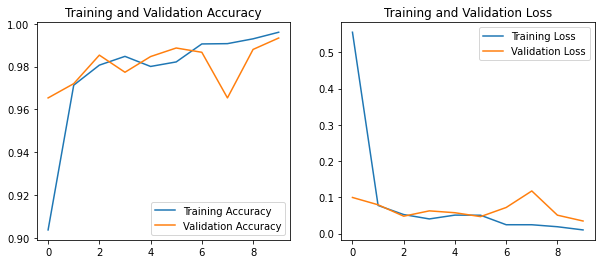

In [109]:
acc = result_NN_t.history['accuracy']
val_acc = result_NN_t.history['val_accuracy']

loss = result_NN_t.history['loss']
val_loss = result_NN_t.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## image augmentation  
- flip to get more data samples

##### Try 1

In [72]:
train_datagen = ImageDataGenerator(
      rescale=1./255,  
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,  # ok to try upside down 
      fill_mode='nearest')


# # Note that the validation data should not be augmented!  -> val no no , only training data for fliping
val_datagen = ImageDataGenerator(rescale=1./255)


In [73]:
train_generator_aug = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,  #32
        class_mode = 'categorical')


val_generator_aug = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,  #32
        class_mode = 'categorical')

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
# model 3 from before

#model_3.compile(loss='categorical_crossentropy',
                  #optimizer='adam',    # optimizers.RMSprop(lr=2e-5),
                  #metrics=['acc'])



In [77]:
# # Note that the validation data should not be augmented!  -> val no no , only training data for fliping
result_aug = model_3.fit_generator(train_generator_aug, 
                         validation_data=val_generator_aug , 
                         epochs=10, 
                         verbose=1)

Epoch 1/10
732/732 [==============================] - 531s 717ms/step - loss: 1.0423 - accuracy: 0.5238 - val_loss: 0.5181 - val_accuracy: 0.7993
Epoch 2/10
732/732 [==============================] - 500s 683ms/step - loss: 0.5822 - accuracy: 0.7621 - val_loss: 0.2778 - val_accuracy: 0.8927
Epoch 3/10
732/732 [==============================] - 537s 733ms/step - loss: 0.4004 - accuracy: 0.8440 - val_loss: 0.2651 - val_accuracy: 0.9100
Epoch 4/10
732/732 [==============================] - 501s 683ms/step - loss: 0.3153 - accuracy: 0.8777 - val_loss: 0.2269 - val_accuracy: 0.9160
Epoch 5/10
732/732 [==============================] - 515s 704ms/step - loss: 0.2754 - accuracy: 0.8985 - val_loss: 0.2628 - val_accuracy: 0.9133
Epoch 6/10
732/732 [==============================] - 498s 679ms/step - loss: 0.2362 - accuracy: 0.9131 - val_loss: 0.1602 - val_accuracy: 0.9487
Epoch 7/10
732/732 [==============================] - 521s 711ms/step - loss: 0.2116 - accuracy: 0.9203 - val_loss: 0.1550 -

In [ ]:
#model_3.save('animal_face_aug.h5')

##### Try 2: Transfer Learning + Image Augmentation

In [79]:
# Transfer Learning on Image Augmentation

NN_transfer_1 = NN_transfer

result_NNtran_aug = NN_transfer_1.fit_generator(train_generator_aug, 
                         validation_data=val_generator_aug , 
                         epochs=10, 
                         verbose=1)

                        # steps_per_epoch=100,
                        # validation_steps=50,

Epoch 1/10
732/732 [==============================] - 1940s 3s/step - loss: 0.1600 - accuracy: 0.9394 - val_loss: 0.0523 - val_accuracy: 0.9873
Epoch 2/10
732/732 [==============================] - 4953s 7s/step - loss: 0.1215 - accuracy: 0.9526 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 3/10
732/732 [==============================] - 12838s 18s/step - loss: 0.1137 - accuracy: 0.9570 - val_loss: 0.0482 - val_accuracy: 0.9867
Epoch 4/10
732/732 [==============================] - 2258s 3s/step - loss: 0.0999 - accuracy: 0.9642 - val_loss: 0.0454 - val_accuracy: 0.9880
Epoch 5/10
732/732 [==============================] - 2183s 3s/step - loss: 0.0952 - accuracy: 0.9656 - val_loss: 0.0417 - val_accuracy: 0.9913
Epoch 6/10
732/732 [==============================] - 1916s 3s/step - loss: 0.0966 - accuracy: 0.9656 - val_loss: 0.0438 - val_accuracy: 0.9907
Epoch 7/10
732/732 [==============================] - 2337s 3s/step - loss: 0.0945 - accuracy: 0.9663 - val_loss: 0.0397 - val_accurac

#  4. Final Result 
## pick the best model - transfer learning from VGG16 (accuracy = 0.9933

In [98]:
# change model HERE
best_model = NN_transfer

# Confusion Matrix 

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
pred = best_model.predict_classes(val_generator)
y_true = val_generator.labels

In [101]:
train_generator.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [102]:
print(confusion_matrix(y_true, pred))

[[498   0   2]
 [  5 491   4]
 [  2   4 494]]


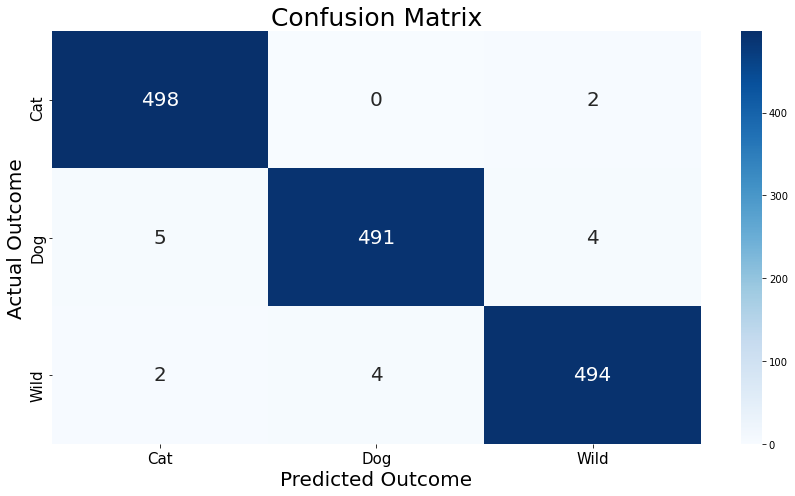

In [103]:
plt.figure(figsize=(35,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(val_generator.labels, pred.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")

# cmlabels = ['True Negatives', "False Positives",
#                'Flase Negatives', "True Positives"]
# for i,t in enumerate(ax.texts):
#   t.set_text(t.get_text() + "\n" + cmlabels[i])

plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Cat', 'Dog', 'Wild']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

#### outcome: get 17 wrong predictions out of 1500 samples in Validiation set

In [110]:
# stephen's Precision, Recall Metrics

metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'),
]

# Classification report

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       0.99      0.98      0.99       500
           2       0.99      0.99      0.99       500

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_true, pred, average="macro")
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_true, pred, average="macro")
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, pred, average="macro")
print('F1 score: %f' % f1)


Accuracy: 0.988667
Precision: 0.988686
Recall: 0.988667
F1 score: 0.988660


####  WANNA SAVE TRAINING TIME? 

can use
1. GPU/Google Colab 
2. Feature pre-extraction  :5.3-using-a-pretrained-convnet.ipynb
